<a id="table-of-contents"></a>
# 📖 Regression

- [🧪 Data Setup](#data-setup)
  - [📥 Load Dataset](#load-dataset)

- [✅ LR Assumption Checks](#assumption-checks)
  - [📐 Linearity](#linearity-check)
  - [📉 Homoscedasticity](#homoscedasticity)
  - [📊 Normality of Residuals](#normality-check)
  - [🔗 Multicollinearity](#multicollinearity)
  - [🔄 Independence](#independence)

- [🔄 Preprocessing](#preprocessing)
  - [⚖️ Feature Scaling](#feature-scaling)
  - [🧹 Feature Selection (RFE)](#feature-selection)
  - [🛠 Feature Engineering](#feature-engineering)
  - [✂️ Train-Test Split](#train-test-split)

- [🚨 Outlier Detection](#outlier-detection)
  - [🔍 Leverage](#leverage-points)
  - [🔥 Cook’s Distance](#cooks-distance)

- [⚙️ Base Model: Linear Regression](#linear-regression)
  - [🏗️ Model Fit](#fit-model)
  - [📏 Evaluation Metrics](#evaluation-metrics)

- [📊 Diagnostic Plots](#diagnostic-plots)
  - [🆚 Predicted vs Actual](#pred-vs-actual)
  - [🌀 Residual Plot](#residual-plot)
  - [📈 QQ Plot](#qq-plot)

- [🧠 Interpretability](#interpretability)
  - [🔢 Coefficients](#coefficients)
  - [🧮 VIF](#vif)
  - [📊 What impacts R²](#r2-factors)
  - [🚨 Overfitting indicators](#overfitting)
  - [🔬 SHAP](#shap)
  - [📊 Partial Dependence Plot](#pdp)

- [🧰 Regularized Models](#regularized-models)
  - [🧊 Ridge Regression](#ridge-regression)
  - [🔥 Lasso Regression](#lasso-regression)
  - [🧃 ElasticNet](#elasticnet)

- [🎯 Hyperparameter Tuning](#hyperparameter-tuning)
  - [🧪 Grid Search](#gridsearch-linear)
  - [🎲 Random Search](#randomsearch-regularized)
  - [🛠️ Extending to Ridge/Lasso (Commented)](#extend-to-ridge)
  
- [📦 Ensemble Methods](#ensemble-methods)
  - [🪵 Bagging (Random Forest Regressor)](#bagging)
  - [🚀 Boosting](#boosting)
  - [🧠 Stacking (Meta-modeling)](#stacking)

<hr style="border: none; height: 1px; background-color: #ddd;" />

<a id="data-setup"></a>
# 🧪 Data Setup

<a id="load-dataset"></a>
#### 📥 Load Dataset

<details><summary><strong>📖 Click to Expand</strong></summary>

- **MedInc**: Median income in block group  
- **HouseAge**: Median house age in block group  
- **AveRooms**: Average number of rooms per household  
- **AveBedrms**: Average number of bedrooms per household  
- **Population**: Block group population  
- **AveOccup**: Average number of household members  
- **Latitude**: Block group latitude  
- **Longitude**: Block group longitude  
- **Target**: Median house value (in $100,000s)


</details>


In [41]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load dataset
df = fetch_california_housing(as_frame=True).frame
target_col = 'MedHouseVal'

# Preview dataset
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


[Back to the top](#table-of-contents)
___



<a id="assumption-checks"></a>
# ✅ LR Assumption Checks

<a id="linearity-check"></a>
#### 📐 Linearity


<details><summary><strong>📖 Click to Expand</strong></summary>

- The **linearity assumption** states that the relationship between each predictor and the outcome is linear.
- Violations mean the model may underfit or misestimate relationships.
- A common diagnostic is a **scatter plot of predicted values vs residuals** — if the pattern is random (no curve), linearity holds.
- You can also use **partial regression plots** or **added variable plots** to assess individual feature relationships.

</details>


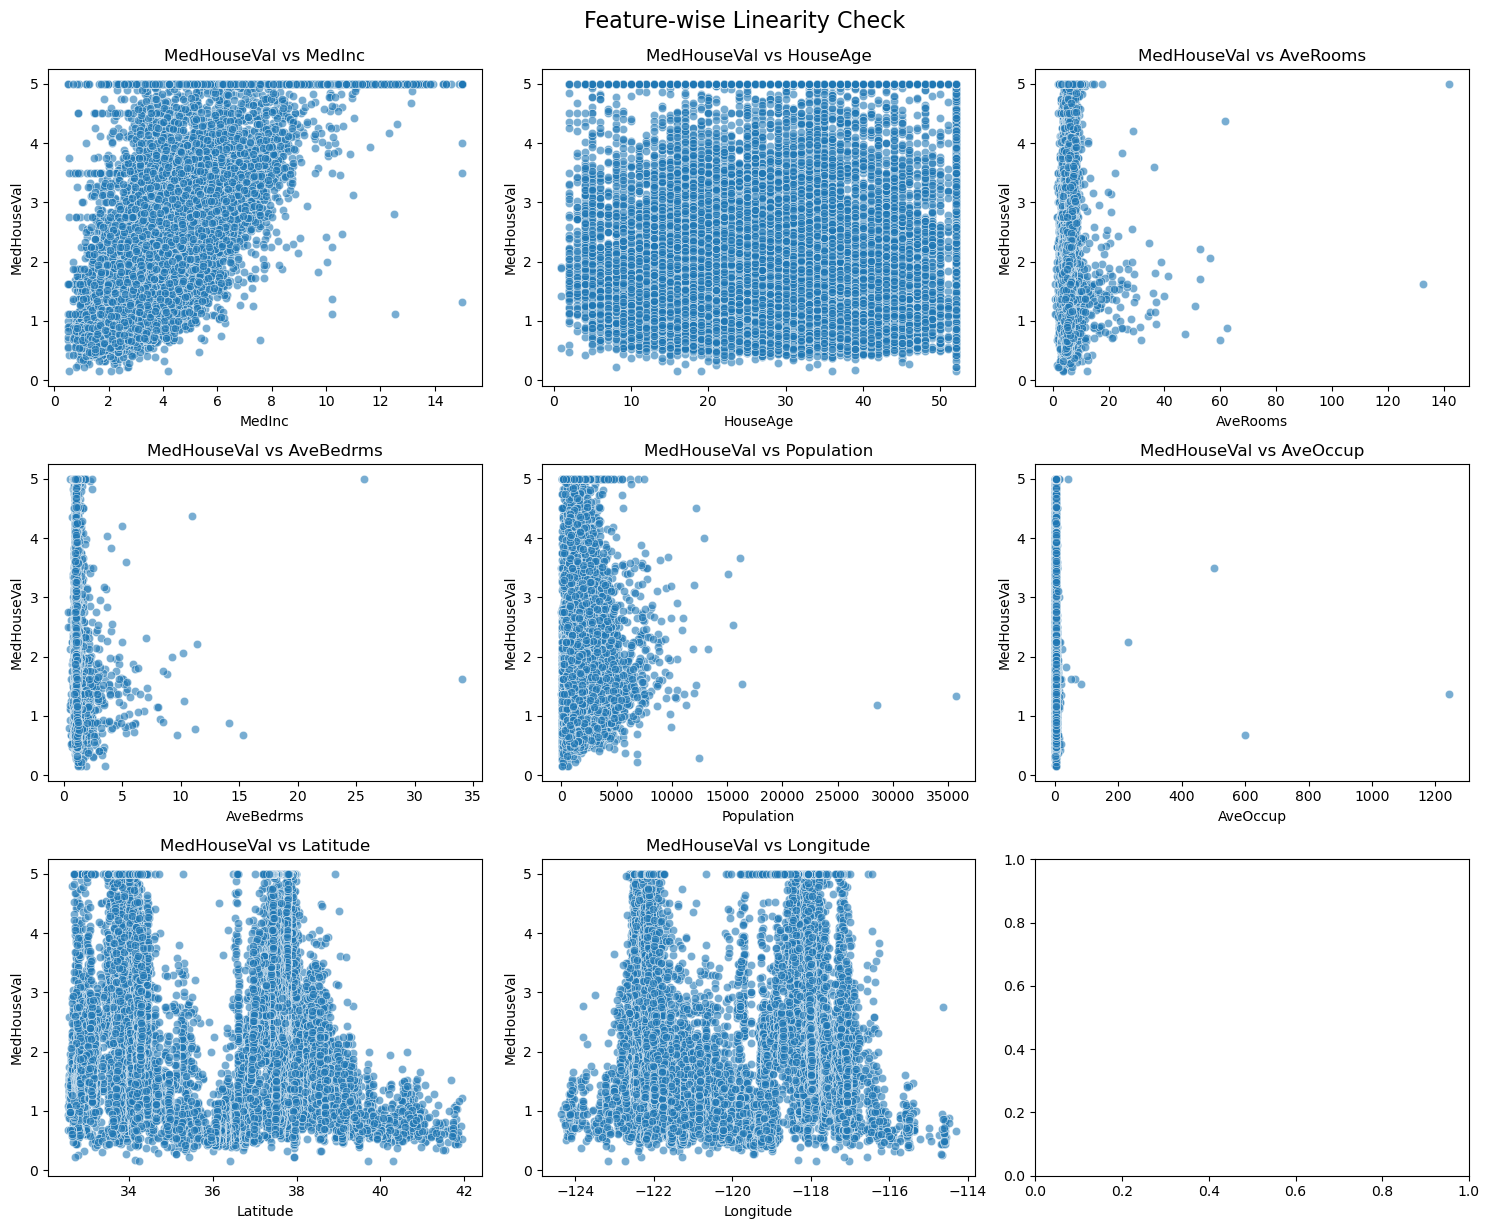

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define X and y using target_col
X = df.drop(columns=[target_col])
y = df[target_col]

# Plot each feature vs target
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for idx, col in enumerate(X.columns):
    sns.scatterplot(x=df[col], y=y, ax=axes[idx], alpha=0.6)
    axes[idx].set_title(f'{target_col} vs {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel(target_col)

plt.tight_layout()
plt.suptitle('Feature-wise Linearity Check', fontsize=16, y=1.02)
plt.show()


<a id="homoscedasticity"></a>
#### 📉 Homoscedasticity

<details><summary><strong>📖 Click to Expand</strong></summary>

- **Homoscedasticity** means residuals have constant variance across all levels of predicted values.
- If variance increases or decreases with prediction size, you have **heteroscedasticity**.
- This violates OLS assumptions and leads to inefficient estimates.
- To detect it, plot **residuals vs predicted values** after model fit.  
  A fan or cone shape indicates heteroscedasticity.

</details>


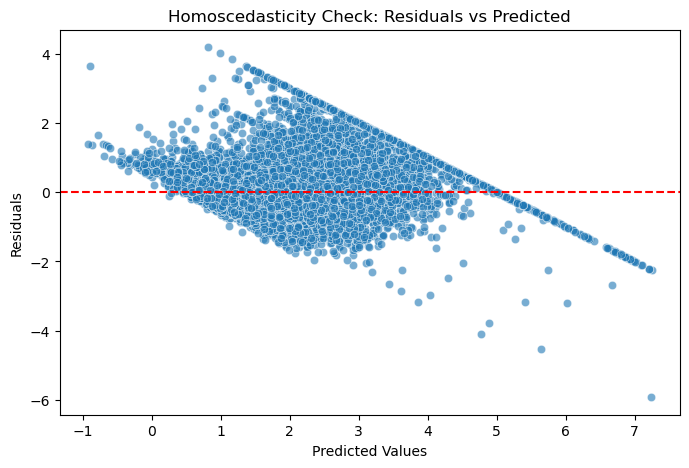

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Redefine X and y in case not done yet
X = df.drop(columns=[target_col])
y = df[target_col]

# Split and fit model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)

# Get residuals
y_pred = lr.predict(X_train)
residuals = y_train - y_pred

# Plot residuals vs predicted
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check: Residuals vs Predicted")
plt.show()


<a id="normality-check"></a>
#### 📊 Normality of Residuals

<details><summary><strong>📖 Click to Expand</strong></summary>

- This assumption says that residuals (errors) should be **normally distributed**.
- It’s especially important when constructing **confidence intervals** or conducting **hypothesis tests** on coefficients.
- While model fit may still work with non-normal residuals, statistical inference will be less valid.
- We check this using:
  - A **histogram** or **KDE plot** of residuals
  - A **Q-Q plot** to compare against a theoretical normal distribution

</details>


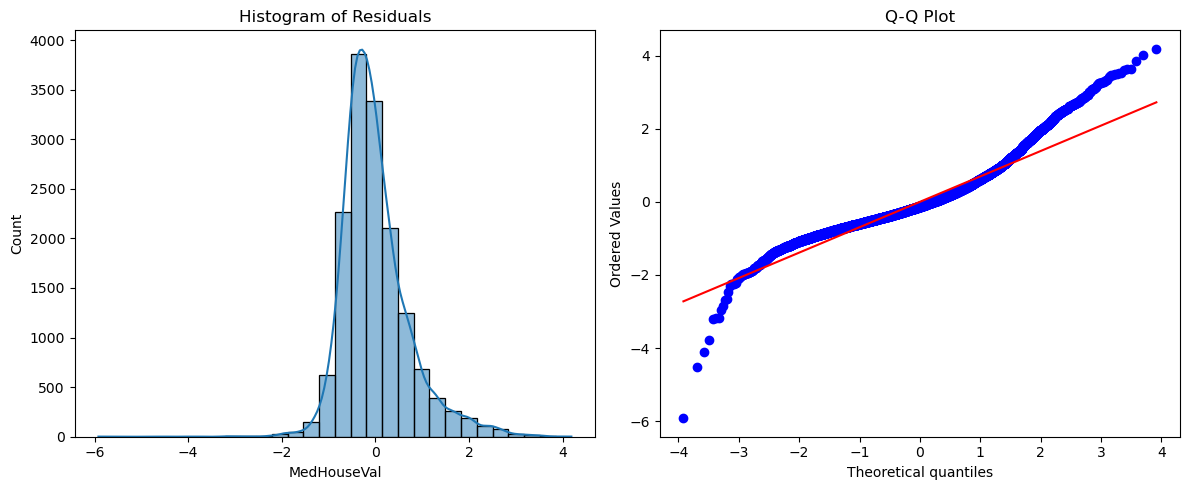

In [44]:
import scipy.stats as stats

# Residuals already computed as: residuals = y_train - y_pred

# Plot histogram + KDE of residuals
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, bins=30)
plt.title("Histogram of Residuals")

# Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")

plt.tight_layout()
plt.show()


<a id="multicollinearity"></a>
#### 🔗 Multicollinearity

<details><summary><strong>📖 Click to Expand</strong></summary>

- **Multicollinearity** refers to high correlation between predictor variables.
- It doesn't affect predictions but **destabilizes coefficient estimates**, making interpretation unreliable.
- Common detection methods:
  - **Variance Inflation Factor (VIF)**: Values > 5 (or 10) signal multicollinearity
  - **Correlation matrix**: For quick pairwise checks

</details>


In [45]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Compute VIF for each feature
X_with_const = sm.add_constant(X)  # statsmodels needs constant for intercept
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i + 1) for i in range(X.shape[1])]

vif_data.sort_values("VIF", ascending=False)


,Feature,VIF
6,Latitude,9.297624
7,Longitude,8.962263
2,AveRooms,8.342786
3,AveBedrms,6.994995
0,MedInc,2.501295
1,HouseAge,1.241254
4,Population,1.138125
5,AveOccup,1.008324


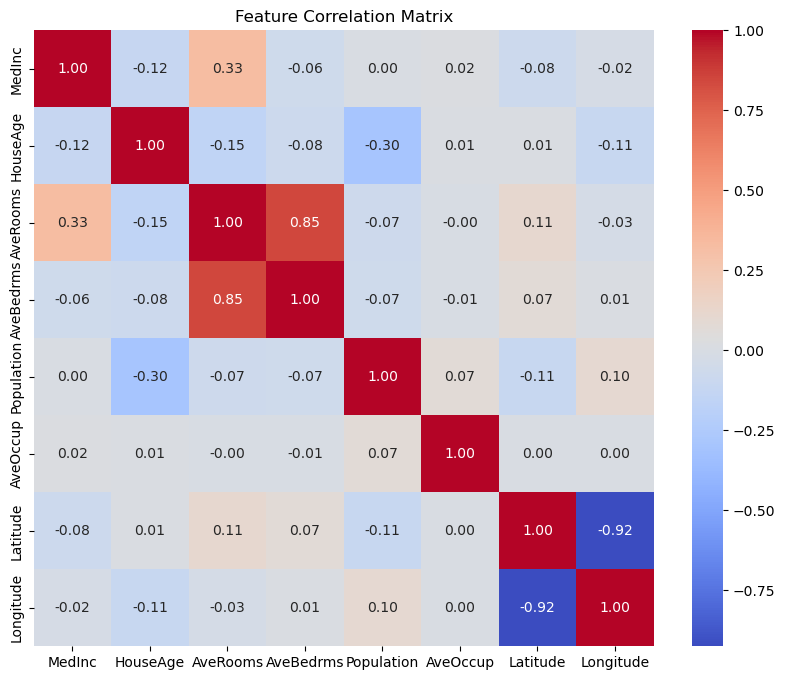

In [46]:
corr = df[X.columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


In [47]:
# Drop features with high VIF (e.g., > 5)
high_vif_features = vif_data[vif_data["VIF"] > 5]["Feature"].tolist()
X = X.drop(columns=high_vif_features)


<a id="independence"></a>
#### 🔄 Independence (optional)

<details><summary><strong>📖 Click to Expand</strong></summary>

- The **independence assumption** means that residuals should not be correlated with each other.
- This mainly applies to **time series** or **clustered data** — it's usually not a concern for cross-sectional datasets like California Housing.
- If applicable, test with:
  - **Durbin-Watson test** (values close to 2 indicate no autocorrelation)
  - **Plot residuals over observation index** to visually inspect patterns

</details>


In [48]:
from statsmodels.stats.stattools import durbin_watson

# Run Durbin-Watson test on residuals
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_stat:.3f}")

# Simple interpretation for business context
if 1.5 <= dw_stat <= 2.5:
    print("✅ Residuals appear to be independent — no patterns over observations.")
else:
    print("⚠️ Residuals may not be independent — investigate possible autocorrelation.")

# Rule of thumb:
# ~2.0  → No autocorrelation
# <1.5 or >2.5 → Possible autocorrelation

Durbin-Watson statistic: 1.963
✅ Residuals appear to be independent — no patterns over observations.


[Back to the top](#table-of-contents)
___


<a id="preprocessing"></a>
# 🔄 Preprocessing

<a id="feature-scaling"></a>
#### ⚖️ Feature Scaling

<details><summary><strong>📖 Click to Expand</strong></summary>

##### Why scale features?

- Many models (like regression, SVM, KNN) assume features are on similar scales.  
- Scaling avoids one large-valued feature dominating others.  
- It's essential for gradient-based optimization and distance-based models.

</details>


In [49]:
# from sklearn.preprocessing import StandardScaler

# Initialize the scaler
# scaler = StandardScaler()

# Fit on training data and transform
# X_scaled = scaler.fit_transform(X)

# If you want a DataFrame back:
# X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)


<a id="feature-selection"></a>
#### 🧹 Feature Selection (RFE)

<details><summary><strong>📖 Click to Expand</strong></summary>

##### Why use RFE?

- Recursive Feature Elimination helps reduce noise by keeping only useful features.  
- It improves model performance and interpretability.  
- Especially useful when you have many correlated predictors.

</details>


In [50]:
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LinearRegression

# Define the model and RFE selector
# base_model = LinearRegression()
# selector = RFE(base_model, n_features_to_select=5)

# Fit and transform
# X_selected = selector.fit_transform(X, y)

# To get selected feature names:
# selected_features = X.columns[selector.get_support()]


<a id="feature-engineering"></a>
#### 🛠 Feature Engineering

<details><summary><strong>📖 Click to Expand</strong></summary>

##### Why engineer features?

- Raw features may not capture real-world relationships well.  
- Ratios, interactions, or log transforms can reveal hidden patterns.  
- Good feature engineering often matters more than model choice.

</details>


In [51]:
# Example: create ratio or interaction features
# df["RoomsPerPerson"] = df["AveRooms"] / (df["Population"] + 1)
# df["BedToRoomRatio"] = df["AveBedrms"] / (df["AveRooms"] + 1)

# Always inspect new features:
# df[["RoomsPerPerson", "BedToRoomRatio"]].describe()


<a id="train-test-split"></a>
#### ✂️ Train-Test Split

<details><summary><strong>📖 Click to Expand</strong></summary>

##### Why split the data?

- We need a separate test set to evaluate real-world performance.  
- Training on all data gives over-optimistic results.  
- Splitting ensures fair evaluation and prevents data leakage.

</details>


In [52]:
# from sklearn.model_selection import train_test_split

# Define features and target
# X = df.drop(columns=[target_col])
# y = df[target_col]

# Split into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


[Back to the top](#table-of-contents)
___



<a id="outlier-detection"></a>
# 🚨 Outlier Detection


<a id="leverage-points"></a>
#### 🔍 Leverage

<details><summary><strong>📖 Click to Expand</strong></summary>

##### 🧠 What is Leverage?

- **Leverage** measures how far an observation's feature values are from the mean of all observations.
- It identifies points that sit on the edge of the predictor space — even if they don’t have large residuals.
- In matrix terms, leverage comes from the **hat matrix** $H = X(X^TX)^{-1}X^T$.

##### 📐 Math:

- The **leverage score** for point $i$ is $h_i = H_{ii}$ (the diagonal of the hat matrix).
- $h_i$ ranges from $0$ to $1$, and high values mean the observation has strong influence on its own predicted value.

##### 💡 Intuition:

- High leverage points may not be outliers in $y$, but they have unusual $X$ values.
- Think of them as **data points in weird neighborhoods** — the model leans heavily on them to make predictions there.

</details>


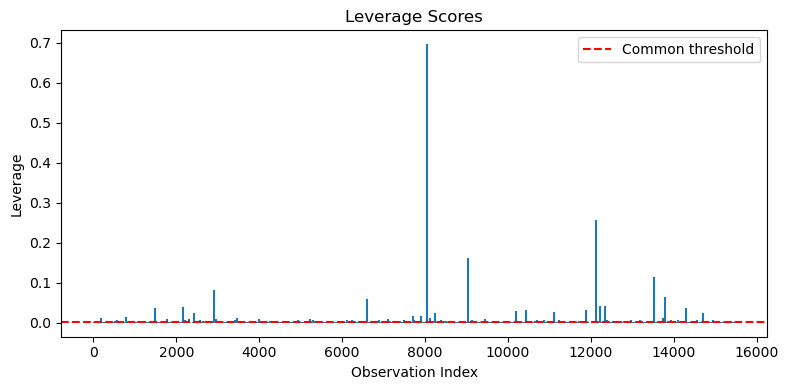

In [53]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Add intercept to X for statsmodels
X_with_const = sm.add_constant(X_train)

# Fit OLS model using statsmodels
model = sm.OLS(y_train, X_with_const).fit()

# Get leverage scores from hat matrix
influence = model.get_influence()
leverage = influence.hat_matrix_diag

# Plot leverage scores
plt.figure(figsize=(8, 4))
plt.stem(np.arange(len(leverage)), leverage, markerfmt=" ", basefmt=" ")
plt.axhline(2 * X_with_const.shape[1] / X_with_const.shape[0], color='red', linestyle='--', label='Common threshold')
plt.xlabel("Observation Index")
plt.ylabel("Leverage")
plt.title("Leverage Scores")
plt.legend()
plt.tight_layout()
plt.show()


In [54]:
# Show top N leverage observations with full feature + target + leverage score
top_n = 5
top_idx = np.argsort(leverage)[-top_n:][::-1]

# Build DataFrame
high_leverage_df = X_train.iloc[top_idx].copy()
high_leverage_df[y_train.name] = y_train.iloc[top_idx].values
high_leverage_df["Leverage"] = leverage[top_idx]

print(f"🔍 Top {top_n} High-Leverage Observations:")
display(high_leverage_df)


🔍 Top 5 High-Leverage Observations:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Leverage
19006,10.2264,45.0,3.166667,0.833333,7460.0,1243.333333,38.32,-121.98,1.37500,0.696212
1914,1.8750,33.0,141.909091,25.636364,30.0,2.727273,38.91,-120.10,5.00001,0.255724
3364,5.5179,36.0,5.142857,1.142857,4198.0,599.714286,40.41,-120.51,0.67500,0.162325
16669,4.2639,46.0,9.076923,1.307692,6532.0,502.461538,35.32,-120.70,3.50000,0.115033
11862,2.6250,25.0,59.875000,15.312500,28.0,1.750000,40.27,-121.25,0.67500,0.082439


<details><summary><strong>📖 So what if leverage is high?</strong></summary>

##### 🚨 What It Means

- High leverage points have **unusual input values** — they sit far from the average data pattern.
- The model relies heavily on them to define the shape of the regression line.
- They're not necessarily outliers in the target, but they’re structurally extreme.

##### 🧠 What You Can Do

- **Inspect**: Are they legit or data glitches?
- **Compare**: Refit the model without them — if results shift a lot, they're too influential.
- **Mitigate**: Use robust models (Ridge, Trees), cap feature extremes, or reweight carefully.

##### 💡 Key Insight

> High leverage = “this point is setting the rules.”  
> Sometimes that’s okay. Sometimes it’s dangerous.

</details>


<a id="cooks-distance"></a>
#### 🔥 Cook’s Distance


<details><summary><strong>📖 Click to Expand</strong></summary>

##### 🔥 What It Measures

- **Cook’s Distance** combines both **leverage** and **residual size**.
- It tells you how much the model's predictions would **change** if you removed a specific observation.
- In short: **“How much does this point bend the model?”**

##### 📐 Math (Simplified)

For each point $i$:
\
$D_i = \frac{(y_i - \hat{y}_i)^2}{p \cdot MSE} \cdot \frac{h_i}{(1 - h_i)^2}$

  where:
  - $h_i$ = leverage
  - $p$ = number of parameters
  - $MSE$ = mean squared error

##### 🧠 What To Do With It

- Points with **high Cook’s D** have both high leverage *and* large residuals → red flags.
- They may be real edge cases or data issues — investigate.
- Use a threshold like `4 / n` or compare to the top 5% of values.

##### 💡 Intuition

> Leverage = weird position.  
> Residual = big error.  
> **Cook’s Distance = both.**

</details>


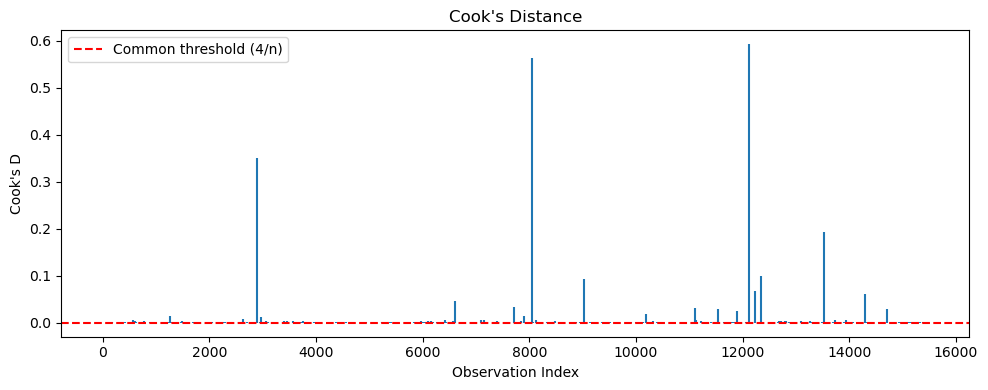

🔥 Top 5 Most Influential Observations (Cook’s Distance):


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Cook's D
1914,1.8750,33.0,141.909091,25.636364,30.0,2.727273,38.91,-120.10,5.00001,0.592553
19006,10.2264,45.0,3.166667,0.833333,7460.0,1243.333333,38.32,-121.98,1.37500,0.563744
11862,2.6250,25.0,59.875000,15.312500,28.0,1.750000,40.27,-121.25,0.67500,0.350446
16669,4.2639,46.0,9.076923,1.307692,6532.0,502.461538,35.32,-120.70,3.50000,0.193252
1102,2.4028,17.0,31.777778,9.703704,47.0,1.740741,40.06,-121.54,0.67500,0.099953


In [55]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Add constant and fit OLS model
X_with_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_with_const).fit()

# Compute influence
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]  # First element is the array of distances

# Plot Cook's Distance
plt.figure(figsize=(10, 4))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=" ", basefmt=" ")
plt.axhline(4 / len(X_train), color='red', linestyle='--', label="Common threshold (4/n)")
plt.title("Cook's Distance")
plt.xlabel("Observation Index")
plt.ylabel("Cook's D")
plt.legend()
plt.tight_layout()
plt.show()

# Print top N influential points
top_n = 5
top_idx = np.argsort(cooks_d)[-top_n:][::-1]
cooks_df = X_train.iloc[top_idx].copy()
cooks_df[y_train.name] = y_train.iloc[top_idx].values
cooks_df["Cook's D"] = cooks_d[top_idx]

print(f"🔥 Top {top_n} Most Influential Observations (Cook’s Distance):")
display(cooks_df)


[Back to the top](#table-of-contents)
___


<a id="linear-regression"></a>
# ⚙️ Base Model: Linear Regression

<details><summary><strong>📖 Click to Expand</strong></summary>

A **linear regression model** estimates the outcome as a weighted sum of input features:

&nbsp;

**Equation:**  
$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n$

&nbsp;

**Where:**
- $\hat{y}$: Predicted value  
- $\beta_0$: Intercept  
- $x_i$: Input feature  
- $\beta_i$: Weight of each feature

The model finds the best-fitting line by minimizing the **sum of squared errors**:

&nbsp;

**Objective:**  
$\text{Minimize} \quad \sum (y_i - \hat{y}_i)^2$

&nbsp;

In business terms:  
Each feature has a consistent “price tag” — the model tells you how much a change in input pushes the prediction up or down.

</details>


<a id="fit-model"></a>
#### 🏗️ Model Fit

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Recreate X and y if needed
X = df.drop(columns=[target_col])
y = df[target_col]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Fit base linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)


<a id="evaluation-metrics"></a>
#### 📏 Evaluation Metrics

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train performance
print("🔧 Train Performance")
print(f"R²: {r2_score(y_train, y_train_pred):.3f} → Explains {r2_score(y_train, y_train_pred)*100:.0f}% of variation in target")
print(f"MAE: {mean_absolute_error(y_train, y_train_pred):.2f} → On average, we're off by ±${mean_absolute_error(y_train, y_train_pred)*100000:.0f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f} → Penalizes big misses more heavily")

print("\n🧪 Test Performance")
print(f"R²: {r2_score(y_test, y_test_pred):.3f} → Explains {r2_score(y_test, y_test_pred)*100:.0f}% of variation in target")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred):.2f} → On average, we're off by ±${mean_absolute_error(y_test, y_test_pred)*100000:.0f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f} → Penalizes big misses more heavily")


🔧 Train Performance
R²: 0.610 → Explains 61% of variation in target
MAE: 0.53 → On average, we're off by ±$52952
RMSE: 0.72 → Penalizes big misses more heavily

🧪 Test Performance
R²: 0.591 → Explains 59% of variation in target
MAE: 0.53 → On average, we're off by ±$52970
RMSE: 0.74 → Penalizes big misses more heavily


[Back to the top](#table-of-contents)
___



<a id="diagnostic-plots"></a>
# 📊 Diagnostic Plots


<a id="pred-vs-actual"></a>
#### 🆚 Predicted vs Actual

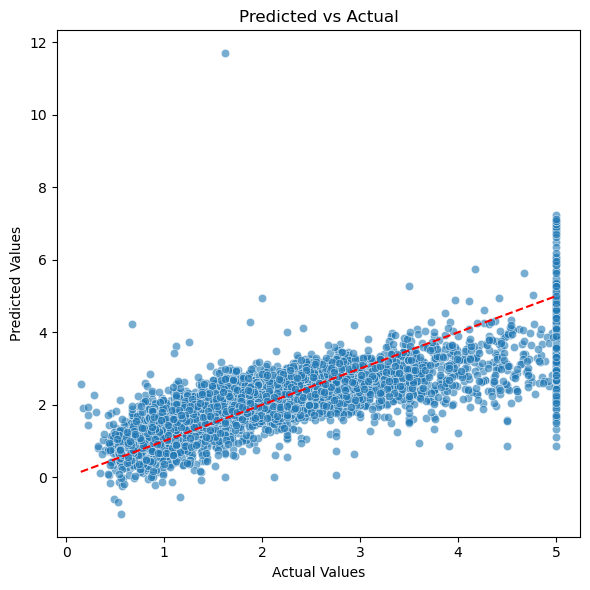

In [58]:
# Plot: Predicted vs Actual
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual")
plt.tight_layout()
plt.show()


<a id="residual-plot"></a>
#### 🌀 Residual Plot

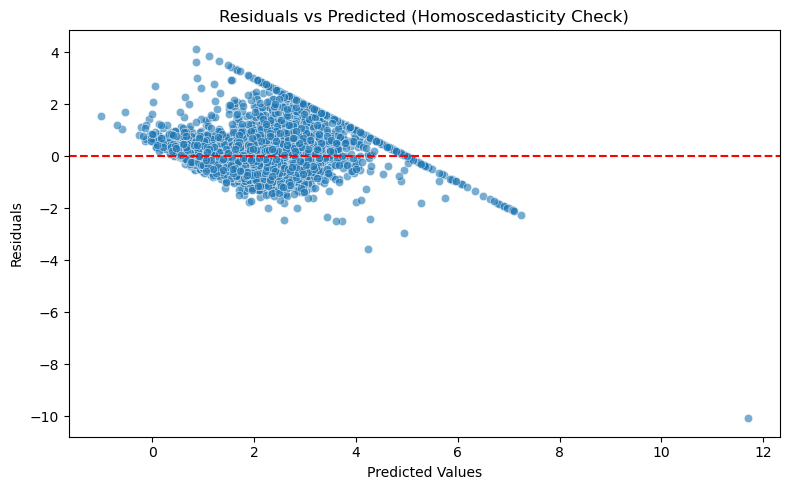

In [59]:
# Plot: Residuals vs Predicted
residuals_test = y_test - y_test_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test_pred, y=residuals_test, alpha=0.6)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Homoscedasticity Check)")
plt.tight_layout()
plt.show()


<a id="qq-plot"></a>
#### 📈 QQ Plot

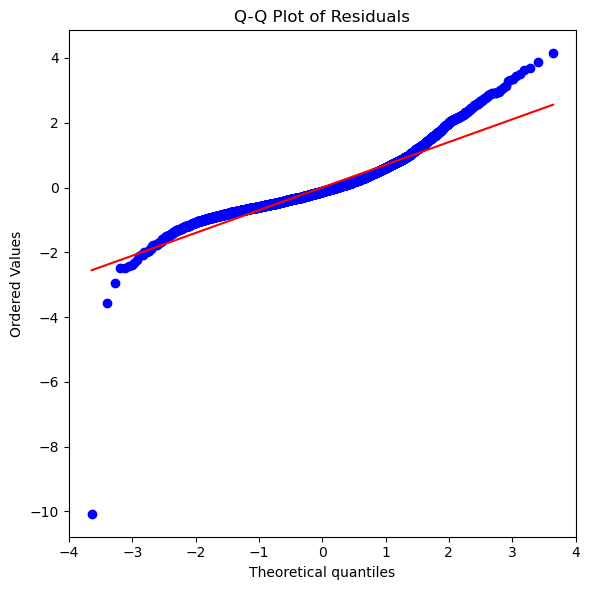

In [60]:
import scipy.stats as stats

# Q-Q plot of residuals
plt.figure(figsize=(6, 6))
stats.probplot(residuals_test, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.tight_layout()
plt.show()


[Back to the top](#table-of-contents)
___



<a id="interpretability"></a>
# 🧠 Interpretability

<a id="coefficients"></a>
#### 🔢 Coefficients

In [61]:
# View model coefficients
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

# Identify most impactful positive and negative drivers
top_positive = coeff_df.iloc[0]
top_negative = coeff_df.iloc[coeff_df["Coefficient"].idxmin()]

print("🧠 Interpretation Summary:")
print(f"- 💡 '{top_positive['Feature']}' has the strongest positive effect on {target_col} (for a unit increase).")
print(f"- 🔻 '{top_negative['Feature']}' has the strongest negative effect on {target_col} (for a unit increase).")

# Optional threshold for low-impact features
low_impact = coeff_df[coeff_df["Coefficient"].abs() < 0.01]["Feature"].tolist()
if low_impact:
    print(f"- 💤 Features like {', '.join(low_impact)} have **minimal predictive power** in this model.")


coeff_df


🧠 Interpretation Summary:
- 💡 'AveBedrms' has the strongest positive effect on MedHouseVal (for a unit increase).
- 🔻 'Population' has the strongest negative effect on MedHouseVal (for a unit increase).
- 💤 Features like HouseAge, AveOccup, Population have **minimal predictive power** in this model.


,Feature,Coefficient
3,AveBedrms,0.794471
0,MedInc,0.447600
7,Longitude,-0.433405
6,Latitude,-0.418555
2,AveRooms,-0.124756
1,HouseAge,0.009568
5,AveOccup,-0.003443
4,Population,-0.000001


<a id="vif"></a>
#### 🧮 VIF (optional)

In [62]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Recompute VIF for final X
X_with_const = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i + 1) for i in range(X.shape[1])]
vif_data = vif_data.sort_values("VIF", ascending=False)

# Show table
display(vif_data)

# Interpretation
vif_threshold = 5
high_vif = vif_data[vif_data["VIF"] > vif_threshold]["Feature"].tolist()

print("\n📉 Multicollinearity Interpretation:")
if high_vif:
    print(f"- ⚠️ The following features may be strongly correlated with others: {', '.join(high_vif)}")
    print("- This could make individual feature effects harder to trust.")
else:
    print("- ✅ No problematic multicollinearity — all features are within acceptable VIF range.")


,Feature,VIF
6,Latitude,9.297624
7,Longitude,8.962263
2,AveRooms,8.342786
3,AveBedrms,6.994995
0,MedInc,2.501295
1,HouseAge,1.241254
4,Population,1.138125
5,AveOccup,1.008324



📉 Multicollinearity Interpretation:
- ⚠️ The following features may be strongly correlated with others: Latitude, Longitude, AveRooms, AveBedrms
- This could make individual feature effects harder to trust.


<a id="r2-factors"></a>
#### 📊 What impacts R²


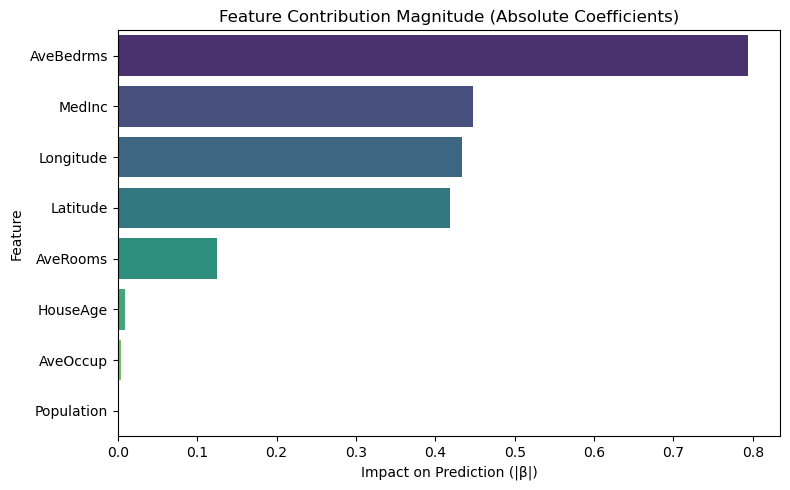

🧠 Interpretation:
- The higher the margitude, the more influence that feature has on the prediction — regardless of direction.
- This helps identify which features the model is leaning on most heavily to make predictions.
- Note: High influence doesn’t mean causation — just strong correlation within this dataset.


In [63]:
# Bar plot of absolute coefficients to show feature impact on variance explained
plt.figure(figsize=(8, 5))
sns.barplot(
    x=coeff_df["Coefficient"].abs(),
    y=coeff_df["Feature"],
    palette="viridis"
)
plt.title("Feature Contribution Magnitude (Absolute Coefficients)")
plt.xlabel("Impact on Prediction (|β|)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Business interpretation
print("🧠 Interpretation:")
print("- The higher the margitude, the more influence that feature has on the prediction — regardless of direction.")
print("- This helps identify which features the model is leaning on most heavily to make predictions.")
print("- Note: High influence doesn’t mean causation — just strong correlation within this dataset.")


<a id="overfitting"></a>
#### 🚨 Overfitting indicators


In [64]:
# Quick check: Train vs Test R²
print(f"Train R²: {r2_score(y_train, y_train_pred):.3f}")
print(f"Test  R²: {r2_score(y_test, y_test_pred):.3f}")

gap = r2_score(y_train, y_train_pred) - r2_score(y_test, y_test_pred)
print(f"Gap: {gap:.3f}")

if gap > 0.1:
    print("⚠️ Likely overfitting — model performs much better on training data.")
else:
    print("✅ No strong overfitting signal — train/test performance is similar.")


Train R²: 0.610
Test  R²: 0.591
Gap: 0.019
✅ No strong overfitting signal — train/test performance is similar.


<a id="shap"></a>
#### 🔬 SHAP



<details><summary><strong>📖 Click to Expand</strong></summary>

- **SHAP (SHapley Additive exPlanations)** helps explain how much each feature contributed to a specific prediction.
- Unlike coefficients, SHAP accounts for interactions and context — making it more reliable for understanding **why** the model made a decision.
- Think of it like **splitting the credit** (or blame) for each prediction across features.

- **PDP (Partial Dependence Plots)** show how a single feature affects predictions while holding others constant.
- Useful to answer: *“As this feature increases, does the predicted outcome go up or down — and by how much?”*

Together, SHAP and PDP bridge the gap between complex models and human intuition.

</details>

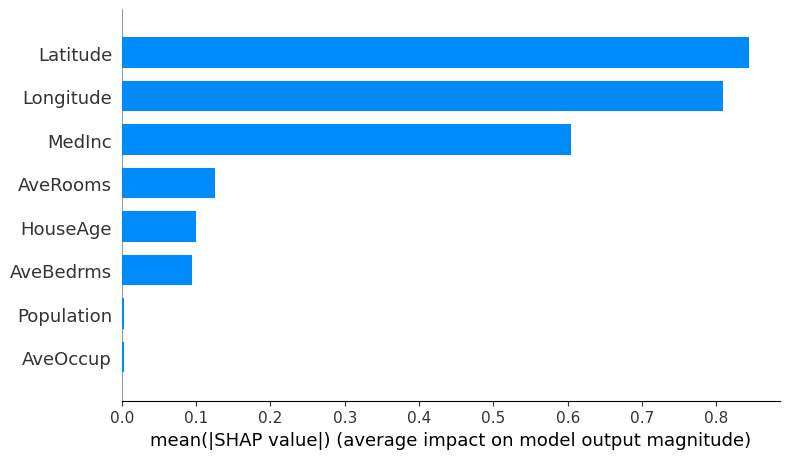

🧠 Interpretation:
- This shows which features contribute most to the model’s predictions across all data points.
- The top features are the biggest drivers of predicted changes in the target.
- Unlike raw coefficients, SHAP values account for interactions and provide a more reliable ranking.


In [65]:
import shap

# Fit model on full data for SHAP
lr.fit(X, y)
explainer = shap.Explainer(lr, X)
shap_values = explainer(X)

# SHAP summary plot
shap.summary_plot(shap_values, X, plot_type="bar")

# Business interpretation
print("🧠 Interpretation:")
print("- This shows which features contribute most to the model’s predictions across all data points.")
print("- The top features are the biggest drivers of predicted changes in the target.")
print("- Unlike raw coefficients, SHAP values account for interactions and provide a more reliable ranking.")


<a id="pdp"></a>
#### 📊 Partial Dependence Plot


<details><summary><strong>📖 Click to Expand</strong></summary>

- A **Partial Dependence Plot (PDP)** shows how the model’s prediction changes as one feature changes, while keeping all other features constant.
- It answers questions like:
  - *“If income increases, how does predicted price change — assuming everything else stays the same?”*
- This helps identify:
  - Whether the relationship is **linear or non-linear**
  - If there are **threshold effects** or diminishing returns
- PDPs are useful for detecting effects that coefficients alone may hide — especially in more complex models.

</details>


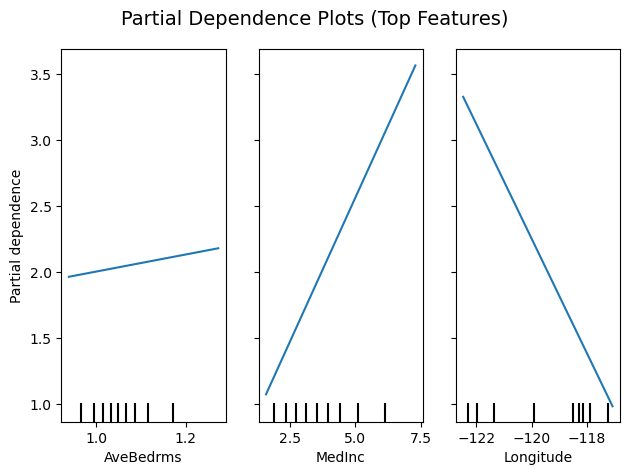

🧠 Interpretation:
- These plots show how the predicted value of 'MedHouseVal' changes when one feature increases, while holding others fixed.
  • As 'AveBedrms' increases, observe whether 'MedHouseVal' rises, falls, or stays flat — this shows its individual effect.
  • As 'MedInc' increases, observe whether 'MedHouseVal' rises, falls, or stays flat — this shows its individual effect.
  • As 'Longitude' increases, observe whether 'MedHouseVal' rises, falls, or stays flat — this shows its individual effect.
- A flat curve → minimal impact. A steep or curved slope → strong or non-linear influence.


In [66]:
from sklearn.inspection import PartialDependenceDisplay

# Pick top 2–3 features from SHAP or coefficients
top_features = coeff_df["Feature"].head(3).tolist()

# Plot PDP
PartialDependenceDisplay.from_estimator(
    lr, X, features=top_features, kind="average", grid_resolution=50
)
plt.suptitle("Partial Dependence Plots (Top Features)", fontsize=14)
plt.tight_layout()
plt.show()

# Business interpretation — tailored to dataset
print("🧠 Interpretation:")
print(f"- These plots show how the predicted value of '{target_col}' changes when one feature increases, while holding others fixed.")
for feature in top_features:
    print(f"  • As '{feature}' increases, observe whether '{target_col}' rises, falls, or stays flat — this shows its individual effect.")
print("- A flat curve → minimal impact. A steep or curved slope → strong or non-linear influence.")


[Back to the top](#table-of-contents)
___



<a id="regularized-models"></a>
# 🧰 Regularized Models


<details><summary><strong>📖 Click to Expand</strong></summary>

- Regularized regression is like **linear regression with guardrails** — it helps prevent overfitting and improves generalization.
- It’s especially useful when:
  - You have **many features**, some of which may be noisy or redundant.
  - There's **multicollinearity** (features are correlated).
  - The model performs **too well on training but poorly on test data**.

There are 3 main types:
- **Ridge**: Shrinks coefficients, but keeps all features
- **Lasso**: Shrinks some coefficients all the way to zero → does feature selection
- **ElasticNet**: A mix of both

Use regularization when your model has **high variance** or you want to **simplify** the feature set.

</details>


<a id="ridge-regression"></a>
#### 🧊 Ridge Regression


<details><summary><strong>📖 Click to Expand</strong></summary>

- **Ridge regression** adds a penalty that discourages large coefficients.  
- It’s useful when all features are important but may be correlated.

&nbsp;

**Objective function:**  
$\text{Loss} = \sum (y_i - \hat{y}_i)^2 + \lambda \sum \beta_j^2$

&nbsp;

- The penalty term $\lambda \sum \beta_j^2$ shrinks coefficients without zeroing them out.
- This reduces overfitting but **keeps all features** in the model.
- Works well when you want to **retain information** while controlling variance.

</details>


In [67]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_ridge_train = ridge.predict(X_train)
y_ridge_test = ridge.predict(X_test)

print("🔧 Ridge Regression")
print(f"Train R²: {r2_score(y_train, y_ridge_train):.3f}")
print(f"Test  R²: {r2_score(y_test, y_ridge_test):.3f}")
print(f"Test  MAE: {mean_absolute_error(y_test, y_ridge_test):.2f}")

🔧 Ridge Regression
Train R²: 0.610
Test  R²: 0.591
Test  MAE: 0.53


<a id="lasso-regression"></a>
#### 🔥 Lasso Regression


<details><summary><strong>📖 Click to Expand</strong></summary>

- **Lasso regression** adds a penalty on the **absolute values** of coefficients.  
- It helps with **feature selection** by shrinking some coefficients to exactly zero.

&nbsp;

**Objective function:**  
$\text{Loss} = \sum (y_i - \hat{y}_i)^2 + \lambda \sum |\beta_j|$

&nbsp;

- The $L1$ penalty encourages **sparsity** — only the most important features survive.
- Use Lasso when you suspect some features **don’t matter** or want a **simpler model**.

</details>


In [68]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_lasso_train = lasso.predict(X_train)
y_lasso_test = lasso.predict(X_test)

print("🔥 Lasso Regression")
print(f"Train R²: {r2_score(y_train, y_lasso_train):.3f}")
print(f"Test  R²: {r2_score(y_test, y_lasso_test):.3f}")
print(f"Test  MAE: {mean_absolute_error(y_test, y_lasso_test):.2f}")

🔥 Lasso Regression
Train R²: 0.546
Test  R²: 0.544
Test  MAE: 0.58


<a id="elasticnet"></a>
#### 🧃 ElasticNet


<details><summary><strong>📖 Click to Expand</strong></summary>

- **ElasticNet** blends Ridge (L2) and Lasso (L1) penalties.  
- It balances **stability and sparsity** — best when you're not sure which to use.

&nbsp;

**Objective function:**  
$\text{Loss} = \sum (y_i - \hat{y}_i)^2 + \lambda_1 \sum |\beta_j| + \lambda_2 \sum \beta_j^2$

&nbsp;

- The L1 part helps with **feature selection**, while L2 improves **stability**.
- ElasticNet is often used as a **default choice** when working with many features.

</details>


In [69]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(X_train, y_train)

y_elastic_train = elastic.predict(X_train)
y_elastic_test = elastic.predict(X_test)

print("🧃 ElasticNet Regression")
print(f"Train R²: {r2_score(y_train, y_elastic_train):.3f}")
print(f"Test  R²: {r2_score(y_test, y_elastic_test):.3f}")
print(f"Test  MAE: {mean_absolute_error(y_test, y_elastic_test):.2f}")


🧃 ElasticNet Regression
Train R²: 0.576
Test  R²: 0.575
Test  MAE: 0.55


[Back to the top](#table-of-contents)
___



<a id="hyperparameter-tuning"></a>
# 🎯 Hyperparameter Tuning

<details><summary><strong>📖 Click to Expand</strong></summary>

- **Hyperparameters** are settings you choose *before* training a model (e.g., how much regularization to apply).
- Unlike model coefficients, hyperparameters aren’t learned from the data — they need to be **tuned** manually or via search.
- In regularized models:
  - `alpha` controls how strong the penalty is
  - A small alpha behaves like linear regression
  - A large alpha shrinks everything too much → underfit

**Why tune?**
- Tuning finds the **best tradeoff** between bias and variance
- Prevents both **underfitting** and **overfitting**
- Improves model generalization on unseen data

You typically use:
- **GridSearchCV**: Tries every combo of values (good for small grids)
- **RandomizedSearchCV**: Tries random combos (faster for large grids)

</details>


<a id="gridsearch-linear"></a>
#### 🧪 Grid Search

<details><summary><strong>📖 Click to Expand</strong></summary>

- **Grid Search** is a brute-force method: it tries **every combination** of specified hyperparameters.
- For each combination:
  1. The model is trained using cross-validation (e.g., 5-fold).
  2. Performance is averaged across folds.
- The best parameter set is chosen based on the scoring metric (e.g., R²).

**Example:**
If you provide 2 values for `fit_intercept` and 2 values for `positive`, it will train 4 separate models and compare their performance.

💡 It’s exhaustive, but gets expensive as the number of hyperparameters or grid size increases.

</details>


In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Set up model and dummy param grid
lr = LinearRegression()

param_grid = {
    "fit_intercept": [True, False],
    "positive": [True, False]  # Optional: enforce positive coefficients
}

grid = GridSearchCV(lr, param_grid, cv=5, scoring="r2")
grid.fit(X_train, y_train)

# Best params and score
print("Best Parameters:", grid.best_params_)
print(f"Best CV R² Score: {grid.best_score_:.3f}")

# Predict using best estimator
y_grid_pred = grid.predict(X_test)
print(f"Test R² with tuned Linear Regression: {r2_score(y_test, y_grid_pred):.3f}")


Best Parameters: {'fit_intercept': True, 'positive': False}
Best CV R² Score: 0.607
Test R² with tuned Linear Regression: 0.591


<a id="randomsearch-regularized"></a>
#### 🎲 Random Search

<details><summary><strong>📖 Click to Expand</strong></summary>

- **Randomized Search** picks **random combinations** of hyperparameters from defined distributions.
- Instead of trying every possibility, it samples `n_iter` times and evaluates those.

**How it works:**
- You define a **distribution** (e.g., uniform or log-uniform) for each parameter.
- For each iteration:
  1. A random value is drawn from each distribution.
  2. The model is trained and scored via cross-validation.
- After all iterations, the best-performing combination is selected.

💡 It’s much faster than Grid Search for large parameter spaces and often finds good results with fewer trials.

</details>


In [71]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define model and parameter distribution
ridge = Ridge()
param_dist = {
    "alpha": uniform(loc=0.001, scale=10)  # e.g., try alphas from 0.001 to ~10
}

# Run randomized search
random_search = RandomizedSearchCV(ridge, param_distributions=param_dist,
                                   n_iter=20, cv=5, scoring="r2", random_state=42)
random_search.fit(X_train, y_train)

# Best params and performance
print("Best Parameters:", random_search.best_params_)
print(f"Best CV R² Score: {random_search.best_score_:.3f}")

# Test performance
y_random_pred = random_search.predict(X_test)
print(f"Test R² with tuned Ridge: {r2_score(y_test, y_random_pred):.3f}")


Best Parameters: {'alpha': 0.20684494295802447}
Best CV R² Score: 0.607
Test R² with tuned Ridge: 0.591


<a id="extend-to-ridge"></a>
#### 🛠️ Extending to Ridge/Lasso (Commented)

<details><summary><strong>📖 Click to Expand</strong></summary>

- Regularized models like Ridge and Lasso have **hyperparameters that matter** — primarily `alpha`, which controls how strongly to penalize large coefficients.
- These models don't just fit the data — they balance fit with simplicity by shrinking coefficients.
- Tuning `alpha` helps you find the **sweet spot**:
  - Too small → model behaves like plain linear regression
  - Too large → model underfits by shrinking everything too aggressively

**How to tune?**
- Use `GridSearchCV` or `RandomizedSearchCV`, just like with any other model.
- The only change is the parameter grid — now you’re tuning `alpha`.

</details>


In [72]:
# Example: how to tune Ridge or Lasso using GridSearchCV

# from sklearn.linear_model import Ridge, Lasso
# from sklearn.model_selection import GridSearchCV

# Define the model (Ridge or Lasso)
# model = Ridge()  # or Lasso()

# Define the grid of alpha values to search
# param_grid = {
#     "alpha": [0.01, 0.1, 1, 10, 100]
# }

# Set up grid search
# grid = GridSearchCV(model, param_grid, cv=5, scoring="r2")
# grid.fit(X_train, y_train)

# View results
# print("Best Parameters:", grid.best_params_)
# print(f"Best CV R² Score: {grid.best_score_:.3f}")

# Use best model for prediction
# y_pred = grid.predict(X_test)
# print(f"Test R² with tuned model: {r2_score(y_test, y_pred):.3f}")


[Back to the top](#table-of-contents)
___



<a id="ensemble-methods"></a>
# 📦 Ensemble Methods

<details><summary><strong>📖 Click to Expand</strong></summary>

- **Ensemble methods** combine multiple models to make more robust and accurate predictions than any single model could alone.

##### 💡 Why ensemble?
- Single models can be biased, noisy, or fragile.
- Ensembling reduces variance, balances out individual model weaknesses, and improves generalization.

##### 🧰 Types of Ensembling:

1. **Bagging (Bootstrap Aggregating):**
   - Trains multiple models on different random subsets of the data.
   - Predictions are averaged (for regression) or voted (for classification).
   - **Example**: Random Forest.

2. **Boosting:**
   - Trains models **sequentially**, where each new model tries to fix the errors of the previous ones.
   - Final prediction is a weighted sum of all models.
   - **Examples**: AdaBoost, Gradient Boosting, XGBoost.

3. **Stacking:**
   - Trains multiple different models and combines their outputs using a **meta-model**.
   - The meta-model learns to weigh or blend base model predictions.
   - Often more powerful, but also more complex.

##### 📈 Bottom Line:
> Ensemble models trade off interpretability for performance — they usually win on accuracy.

</details>


<a id="bagging"></a>
#### 🪵 Bagging (Random Forest Regressor)

<details><summary><strong>📖 Click to Expand</strong></summary>

##### 🔍 What is Bagging?

- **Bagging** (Bootstrap Aggregating) is an ensemble method that trains multiple models on random subsets of the data (with replacement).
- Each model is trained independently.
- The final prediction is the **average** of all predictions (for regression).

##### 🧠 Why use it?

- Bagging reduces **variance** by averaging out model noise.
- It helps stabilize models that tend to overfit — like decision trees.

##### ✅ Good candidates for base models

Bagging works with **any regression model** that supports `.fit(X, y)` and `.predict(X)`. Common choices include:

- **DecisionTreeRegressor**  
  High variance → Bagging helps stabilize it.

- **KNeighborsRegressor**  
  Very sensitive to noise and local patterns — Bagging improves robustness.

- **LinearRegression**  
  Works, but since it's low variance already, Bagging often adds little.

- **SVR (Support Vector Regressor)**  
  Can be used if tuned well. Bagging may reduce sensitivity to outliers.

- **Ridge / Lasso / BayesianRidge**  
  Technically allowed, but already regularized — Bagging rarely adds value.

- **MLPRegressor (Neural Networks)**  
  Possible but computationally heavy. Use with caution.

##### 🌲 Random Forest as an Example

- A **Random Forest Regressor** is a specific type of bagging:
  - Uses decision trees as base models
  - Adds extra randomness by selecting a random subset of features at each split
- But bagging isn’t limited to trees — it can be applied to any model type.

##### ✅ Benefits

- More stable than a single model
- Less sensitive to noise and overfitting
- Easy to parallelize

</details>


In [73]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Define base estimator — can be swapped out (e.g., DecisionTreeRegressor, LinearRegression, etc.)
base_model = DecisionTreeRegressor()

# Wrap it in a Bagging ensemble
bagging = BaggingRegressor(base_estimator=base_model, n_estimators=100, random_state=42)
bagging.fit(X_train, y_train)

# Predictions
y_bag_train = bagging.predict(X_train)
y_bag_test = bagging.predict(X_test)

# Evaluation
print("🧺 Bagging Regressor (with Decision Tree)")
print(f"Train R²: {r2_score(y_train, y_bag_train):.3f}")
print(f"Test  R²: {r2_score(y_test, y_bag_test):.3f}")
print(f"Test  MAE: {mean_absolute_error(y_test, y_bag_test):.2f}")


`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


🧺 Bagging Regressor (with Decision Tree)
Train R²: 0.973
Test  R²: 0.808
Test  MAE: 0.33


<a id="boosting"></a>
#### 🚀 Boosting

<details><summary><strong>📖 Click to Expand</strong></summary>

##### 🚀 What is Boosting?

- **Boosting** builds models **sequentially**, not in parallel like Bagging.
- Each new model is trained to fix the **mistakes** made by the previous model.
- The final prediction is a **weighted sum** of all the individual models.

##### 🔁 How it works (simplified):

1. Train the first model on the data.
2. Look at where it did poorly.
3. Train the second model to focus more on those mistakes.
4. Repeat for several rounds.
5. Combine all models (usually by weighted average).

##### 🧠 Why Boosting Works

- It focuses model capacity on the **hardest-to-predict cases**.
- Often gives better performance than bagging, especially on structured/tabular data.
- Reduces both bias and variance.

##### 🔧 Popular Boosting Algorithms

- **AdaBoost**: Adjusts weights of training points.
- **Gradient Boosting**: Fits on the residuals (errors) of the previous model.
- **XGBoost / LightGBM / CatBoost**: Faster, more scalable variants of gradient boosting.

##### ⚠️ Caution

- Boosting is powerful but more prone to overfitting if not tuned carefully.
- Models are sequential — slower to train and harder to parallelize than Bagging.

</details>


In [74]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Train Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

# Predictions
y_gbr_train = gbr.predict(X_train)
y_gbr_test = gbr.predict(X_test)

# Evaluation
print("🚀 Gradient Boosting Regressor")
print(f"Train R²: {r2_score(y_train, y_gbr_train):.3f}")
print(f"Test  R²: {r2_score(y_test, y_gbr_test):.3f}")
print(f"Test  MAE: {mean_absolute_error(y_test, y_gbr_test):.2f}")


🚀 Gradient Boosting Regressor
Train R²: 0.806
Test  R²: 0.781
Test  MAE: 0.37


<a id="stacking"></a>
#### 🧠 Stacking (Meta-modeling)

<details><summary><strong>📖 Click to Expand</strong></summary>

##### 🔁 How it works:
- **Stacking** combines multiple models by training a **meta-model** to learn how to best combine their predictions.
- Instead of averaging like Bagging or Boosting, it lets a new model decide **how much to trust each base model**.


1. Train several base models (e.g., linear regression, tree, SVR).
2. Use their predictions as **features** to train a new model (the "meta-model").
3. The meta-model learns patterns in the predictions — which base models work better under which conditions.

##### 🧩 Why use Stacking?

- Leverages strengths of diverse models (e.g., tree + linear + neighbors).
- Usually outperforms any single base model — especially when the base models have **different biases**.

##### 📌 Key Points:

- Base models should be **diverse** — combining 3 similar models adds little.
- Cross-validation is usually needed to avoid overfitting from using predicted outputs during training.
- Common meta-models: LinearRegression, Ridge, LogisticRegression (for classification), GradientBoosting.

##### ⚠️ Tradeoff:

> High performance, but slower, harder to debug, and trickier to tune than Bagging/Boosting.

</details>


In [75]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error

# Define base models (can mix different types)
base_models = [
    ("tree", DecisionTreeRegressor(max_depth=5)),
    ("svr", SVR()),
    ("linear", LinearRegression())
]

# Define meta-model (also tunable — RidgeCV here adds internal regularization)
meta_model = RidgeCV()

# Build stacking regressor
stacking = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)
stacking.fit(X_train, y_train)

# Predictions
y_stack_train = stacking.predict(X_train)
y_stack_test = stacking.predict(X_test)

# Evaluation
print("🧠 Stacking Regressor")
print(f"Train R²: {r2_score(y_train, y_stack_train):.3f}")
print(f"Test  R²: {r2_score(y_test, y_stack_test):.3f}")
print(f"Test  MAE: {mean_absolute_error(y_test, y_stack_test):.2f}")


🧠 Stacking Regressor
Train R²: 0.679
Test  R²: 0.657
Test  MAE: 0.48


[Back to the top](#table-of-contents)
___

